# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [132]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

[5 pts]

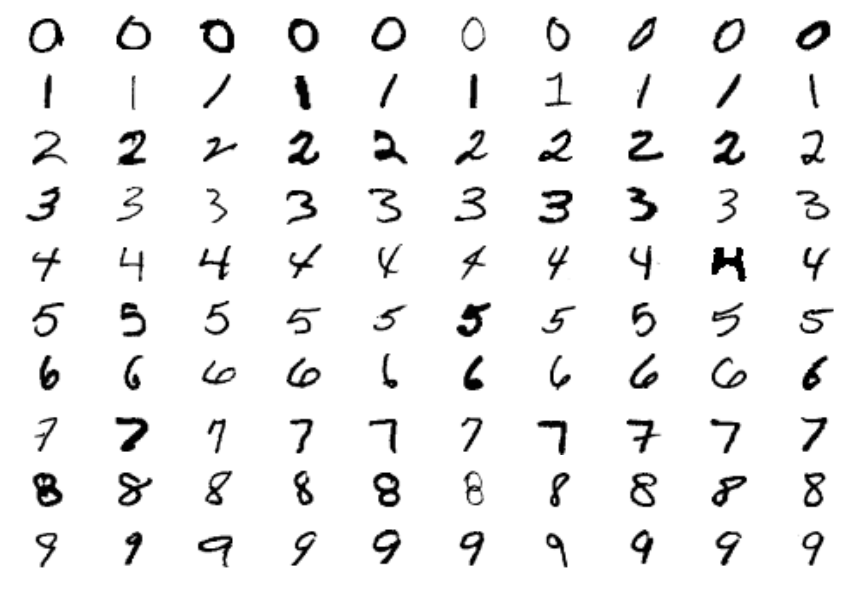

In [3]:
def P1(num_examples=10):

### STUDENT START ###
    plt.rc('image', cmap='Greys')
    plt.figure(figsize=(15, 10))
    fignum = 1

    for i in range(10): # Looping through digits 0 through 9
        for j in range(num_examples):
            arrayIndices = np.where(mini_train_labels == i)[0] # Selecting all label indices for a particular digit
            image = mini_train_data[np.random.choice(arrayIndices, 1)].reshape(28, 28) # Randomly selecting a digit of a particular label
            plt.subplot(10,num_examples,fignum)
            fignum += 1
            plt.axis('off')
            plt.imshow(image)
### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

[3 pts]

In [4]:
def P2(k_values):

### STUDENT START ###
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(mini_train_data, mini_train_labels)
        print 'For k = {0}, Accuracy = {1}'.format(k, model.score(dev_data, dev_labels))
        
        if k == 1:
            label_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
            preds = model.predict(dev_data)
            cls_rpt = classification_report(y_true = dev_labels, y_pred = preds, target_names = label_names)

    print '- - - - -'
    print 'Classification report for k == 1'
    print cls_rpt
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

For k = 1, Accuracy = 0.888
For k = 3, Accuracy = 0.878
For k = 5, Accuracy = 0.869
For k = 7, Accuracy = 0.865
For k = 9, Accuracy = 0.863
- - - - -
Classification report for k == 1
             precision    recall  f1-score   support

       Zero       0.91      0.98      0.94        99
        One       0.89      1.00      0.94       105
        Two       0.99      0.79      0.88       102
      Three       0.77      0.87      0.82        86
       Four       0.89      0.82      0.85       104
       Five       0.93      0.84      0.88        91
        Six       0.94      0.96      0.95        98
      Seven       0.89      0.92      0.90       113
      Eight       0.94      0.88      0.91        96
       Nine       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



**ANSWER: ** Most difficult digit is ** 9 ** as the f1 score is the lowest

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

[2 pts]

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    for train_size in train_sizes:
        temp_train_data, temp_train_labels = X[:train_size], Y[:train_size] # Selecting subsets of data
        model = KNeighborsClassifier(n_neighbors = 1)
        model.fit(temp_train_data, temp_train_labels)
        
        t1 = time.time()
        preds = model.predict(dev_data)
        t2 = time.time()
        timetaken = round(t2 - t1, 3)

        accuracy = model.score(dev_data, dev_labels)
        print 'Train_size: {0}, Accuracy: {1}, Time_taken {2} seconds'.format(train_size, accuracy, timetaken)
        accuracies.append(accuracy)

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Train_size: 100, Accuracy: 0.72, Time_taken 0.103 seconds
Train_size: 200, Accuracy: 0.786, Time_taken 0.203 seconds
Train_size: 400, Accuracy: 0.841, Time_taken 0.402 seconds
Train_size: 800, Accuracy: 0.884, Time_taken 0.818 seconds
Train_size: 1600, Accuracy: 0.902, Time_taken 1.699 seconds
Train_size: 3200, Accuracy: 0.926, Time_taken 3.467 seconds
Train_size: 6400, Accuracy: 0.937, Time_taken 6.574 seconds
Train_size: 12800, Accuracy: 0.959, Time_taken 13.178 seconds
Train_size: 25000, Accuracy: 0.97, Time_taken 27.402 seconds


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

[3 pts]

Linear Regression accuracy prediction for 60000: 1.24307226036
Log2: Linear Regression accuracy prediction for 60000: 1.03386513757


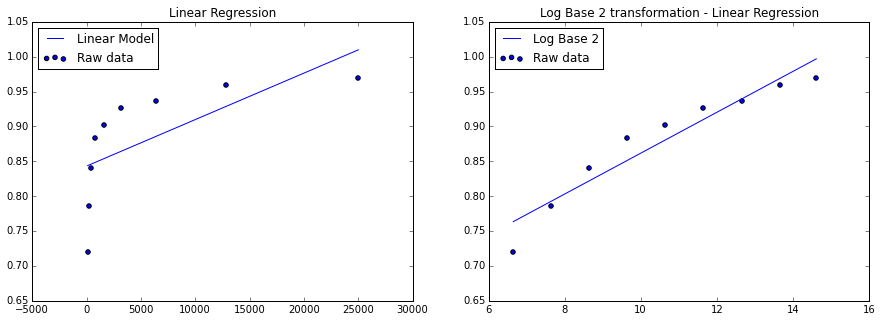

In [6]:
def P4():

### STUDENT START ###
# Linear Regression
    lrX = np.array(train_sizes).reshape(len(train_sizes), 1) # Convert X into form expected by Linear Regression
    lrY = accuracies
    lr = LinearRegression(fit_intercept=True)
    lr.fit(lrX, lrY)

# Transformation Log base 2 transformation of train_sizes
    lrlog = LinearRegression(fit_intercept=True)
    lrXlog = np.log2(lrX) # Applying log base 2 to train sizes
    lrlog.fit(lrXlog, lrY)
    
# Printing predictions
    print 'Linear Regression accuracy prediction for 60000:', lr.predict(60000)[0]
    print 'Log2: Linear Regression accuracy prediction for 60000:', lrlog.predict(np.log2(60000))[0]

# Plotting graph
    plt.figure(figsize=(15, 5)) 
    
    plt.subplot(1, 2, 1)
    plt.scatter(lrX, lrY, label = "Raw data")
    plt.plot(lrX, lr.predict(lrX), label = "Linear Model")
    plt.legend(loc="best")
    plt.title("Linear Regression")
    
    plt.subplot(1, 2, 2)
    plt.scatter(lrXlog, lrY, label = "Raw data")
    plt.plot(lrXlog, lrlog.predict(lrXlog), label = "Log Base 2")
    plt.legend(loc="best")
    plt.title("Log Base 2 transformation - Linear Regression")
    
### STUDENT END ###

P4()

** ANSWER: **  
Linear regression model is predicting accuracy for n=60000 as 1.243. This is wrong because clearly accuracy cannot be greater than 1.  
By applying a log base 2 transformation of the X variable the prediction is much more reasonable at 1.033. However, it is still incorrect because it is predicting an accurancy of more than 1.

Fit a 1-NN and output a confusion matrix for the dev data. For each of the top 5 confused pairs, display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[4 pts]

Confusion Matrix:
[[ 97   0   4   1   0   2   1   1   0   1]
 [  0 105   4   0   2   0   1   4   2   0]
 [  0   0  81   0   0   0   1   0   0   0]
 [  0   0   4  75   0   9   0   1   5   3]
 [  0   0   0   0  85   0   1   1   0   9]
 [  0   0   0   3   0  76   0   0   2   1]
 [  2   0   0   0   3   0  94   0   1   0]
 [  0   0   4   3   0   1   0 104   0   5]
 [  0   0   3   1   0   1   0   0  84   0]
 [  0   0   2   3  14   2   0   2   2  87]]
Displaying max 10 digit per confused pair
Predicted 9 ; Actual 4


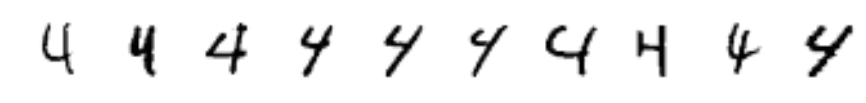

Predicted 3 ; Actual 5


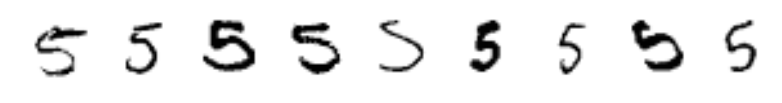

Predicted 4 ; Actual 9


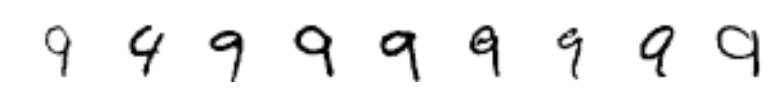

Predicted 3 ; Actual 8


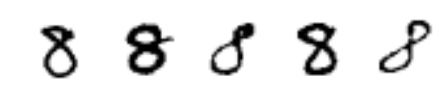

Predicted 7 ; Actual 9


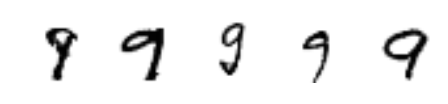

In [7]:
def P5():

### STUDENT START ###
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(mini_train_data, mini_train_labels)
    preds = model.predict(dev_data)
    cfm = confusion_matrix(preds, dev_labels)
    print "Confusion Matrix:"
    print cfm

    for i in range(cfm.shape[0]): cfm[i, i] = -1           # Turning the diagonal of confusion matrix into -1
    flatcfm = cfm.flatten()                                # Flattenning confusion matrix
    print "Displaying max 10 digit per confused pair"
    for _ in range(5):
        i = np.where(flatcfm == flatcfm.max())             # Getting flat index of most confused digit
        cfmindex = np.unravel_index(i[0][0], cfm.shape)    # Converting flat index to confusion matrix index
        flatcfm[i[0][0]] = -1                              # Assign zero to obtain next max value in next iteration
        pred = cfmindex[0]                                 # Contains predicted digit
        dev_label = cfmindex[1]                            # Contains true digit

        array_wrong_preds = np.where(preds == pred)                               # Indices of predicted digits in predicted list
        array_true_digits = np.where(dev_labels == dev_label)                     # Indices of true digits in dev_labels 
        confused_digits = np.intersect1d(array_wrong_preds, array_true_digits)    # Finding intersection to get list of confused digits

        # Printing max 10 digits for each confused pair
        
        if len(confused_digits) > 10:
            confused_digits = confused_digits[:10]
        plt.figure(figsize=(len(confused_digits)*1.5, len(confused_digits)))
        fignum = 1
        for j in confused_digits:
            if fignum == 1:
                print 'Predicted', pred, '; Actual', dev_label
            plt.subplot(1, len(confused_digits), fignum)
            fignum += 1
            plt.axis('off')
            plt.imshow(dev_data[j].reshape(28, 28))

        plt.show()
### STUDENT END ###

preds = P5()


(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

[4 pts]

Gaussian blur in action:


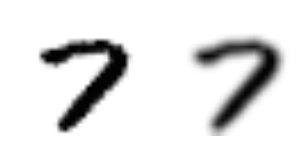

Accuracy: Blurred training data only: 0.982
Accuracy: Blurred dev data only: 0.962
Accuracy: Blurred both dev and training data: 0.979


In [8]:
def findNeighbors(pixel, edge = 28):
    # Convert index into tuple
    x = int(pixel/edge)
    y = pixel - (x * edge)
    n = [''] * 8
    n[0] = (x-1, y-1)
    n[1] = (x-1, y)
    n[2] = (x-1, y+1)
    n[3] = (x, y-1)
    n[4] = (x, y+1)
    n[5] = (x+1, y-1)
    n[6] = (x+1, y)
    n[7] = (x+1, y+1)
    # Removing pixels not in matrix
    nghb = [n[i] for i in range(8) if n[i][0] >= 0 and n[i][1] >= 0 and n[i][0] < edge and n[i][1] < edge]
    pixels = [nghb[i][0]*edge + nghb[i][1] for i in range(len(nghb))]
    pixels.append(pixel)
    return pixels

def gblur(img):
    gblr = np.array(img)
    for i in range(len(img)):
        ngbhrs = img[findNeighbors(i)]        # Getting list of neighbors (Max 8; min 3)
        gblr[i] = sum(ngbhrs) / len(ngbhrs)   # Computing mean of neoghbors and self pixel value 
    return gblr

# Example of Gaussian blur
print "Gaussian blur in action:"
plt.figure(figsize=(5, 3))
plt.subplot(1, 2, 1)
plt.imshow(train_data[9000].reshape(28, 28))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gblur(train_data[9000]).reshape(28, 28))
plt.axis('off')
plt.show()

def P6():
    
### STUDENT START ###
# Pre-processing train data
    preprocess_train_data = np.array(train_data)
    for i, val in enumerate(preprocess_train_data):
        preprocess_train_data[i] = gblur(val)

# Pre-processing dev data
    preprocess_dev_data = np.array(dev_data)
    for i, val in enumerate(preprocess_dev_data):
        preprocess_dev_data[i] = gblur(val)    
    
# Calculating Accuracy
# With blurring training only
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(preprocess_train_data, train_labels)
    print 'Accuracy: Blurred training data only:', model.score(dev_data, dev_labels)
    
# With blurring dev data only
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(train_data, train_labels)
    print 'Accuracy: Blurred dev data only:', model.score(preprocess_dev_data, dev_labels)   
    
# With blurring Blur both dev and training
    model = KNeighborsClassifier(n_neighbors = 1)
    model.fit(preprocess_train_data, train_labels)
    print 'Accuracy: Blurred both dev and training data:', model.score(preprocess_dev_data, dev_labels) 

### STUDENT END ###

P6()

ANSWER:

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

[4 pts]

In [9]:
def P7():

### STUDENT START ###
# BernoulliNB
    threshold = 0.5
    alpha = 1

    clf = BernoulliNB(alpha=alpha, binarize=threshold)
    clf.fit(mini_train_data, mini_train_labels)
    print 'BernoulliNB Accuracy:', clf.score(dev_data, dev_labels)

# MultinomialNB
    # Mapping pixel values to 0, 1 or 2
    def mappingto123(inputdata):
        temp = np.array(inputdata)
        for rowindex, rowvalue in enumerate(temp):
            for columnindex, columnvalue in enumerate(rowvalue):
                if columnvalue <= 1.0/3:
                    temp[rowindex, columnindex] = 0
                elif columnvalue <= 2.0/3:
                    temp[rowindex, columnindex] = 1
                else:
                    temp[rowindex, columnindex] = 2
        return temp

    multiclf = MultinomialNB(alpha=alpha)
    multiclf.fit(mappingto123(mini_train_data), mini_train_labels)
    print 'MultinomialNB Accuracy:', multiclf.score(dev_data, dev_labels)
    
### STUDENT END ###

P7()

BernoulliNB Accuracy: 0.817
MultinomialNB Accuracy: 0.797


** ANSWER: **  
The accuracy of both the Bernoullli and Multinomial Naive Bayes classifiers are about the same with MultinomialNB on the lower side. This is indicative of the nature of the data i.e. digits (which is 2 dimensional). Just 0 and 1 are enough to identify a digit.  
However, if the task was face recognization, then MultinomialNB will perform better because different shades will help define the contours of a face.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter). What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

[3 pts]

In [14]:
def P8(alphas):

### STUDENT START ###
    threshold = 0.5
    bnb = BernoulliNB(binarize=threshold)
    clf = GridSearchCV(bnb, alphas)
    clf.fit(mini_train_data, mini_train_labels)
    
    # Printing Accuracy @ diffirent alphas
    for params, score, l in clf.grid_scores_:
        print '{0}; Accuracy: {1}'.format(params, score)
    
    print '\nBest Alpha: {0}; Accuracy: {1}'.format(clf.best_params_, clf.best_score_)


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

{'alpha': 0.0}; Accuracy: 0.092
{'alpha': 0.0001}; Accuracy: 0.818
{'alpha': 0.001}; Accuracy: 0.82
{'alpha': 0.01}; Accuracy: 0.821
{'alpha': 0.1}; Accuracy: 0.816
{'alpha': 0.5}; Accuracy: 0.803
{'alpha': 1.0}; Accuracy: 0.802
{'alpha': 2.0}; Accuracy: 0.797
{'alpha': 10.0}; Accuracy: 0.76

Best Alpha: {'alpha': 0.01}; Accuracy: 0.821


** ANSWER: **  
The accuracy at alpha = 0 is a low 0.099. This is expected. Since training data is finite, it is possible that for some classes some features will not be represented in the training data. This will mean probability of that feature given the class will be zero which will result in Naive Bayes calculating probability of that class given all features to be zero. In our training data many such features/pixels exists hence the accuracy is about 10% which means that the classifier at alpha = 0 is no better than random chance.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

[3 pts]

GaussianNB accuracy: 0.627
GaussianNB accuracy after adding noise: 0.8


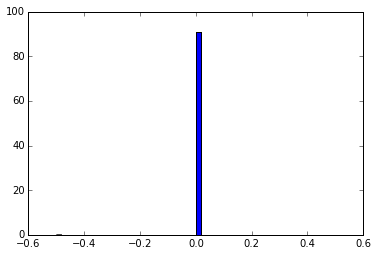

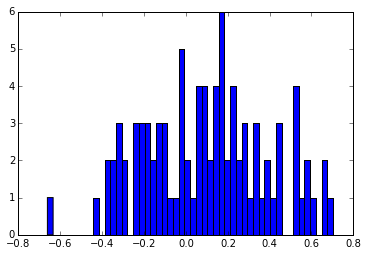

In [32]:
def P9():

### STUDENT END ###
# Gaussian Naive Bayes
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    print "GaussianNB accuracy:", gnb.score(dev_data, dev_labels)

# Adding noise to training and dev data
    mu = mini_train_data.mean()
    sigma = np.std(mini_train_data)
    noise = np.random.normal(mu, sigma, mini_train_data.shape)
    noisy_train_data = np.array(mini_train_data + noise)
    gnb = GaussianNB()
    gnb.fit(noisy_train_data, mini_train_labels)

    noise = np.random.normal(mu, sigma, dev_data.shape)
    noisy_dev_data = np.array(dev_data + noise)
    print "GaussianNB accuracy after adding noise:", gnb.score(noisy_dev_data, dev_labels)
    

# Plotting distribution of a single feature of a single digit
    plt.figure()
    setofdigit = mini_train_data[mini_train_labels==4]
    plt.hist(setofdigit[:,310], 50)
    plt.show()
    
    setofdigit = noisy_train_data[mini_train_labels==4]
    plt.hist(setofdigit[:,310], 50)
    plt.show()
### STUDENT END ###

P9()

** ANSWER: **  
The accuracy of GaussianNB is only around ~0.6. GaussianNB calculates probabilities of features given a class by assuming the distribution to be normal. The first historgram above shows that the distribution of the 310th feature of the digit 4. It is clear from the histogram that the distribution is not normal. If there was enough training data, then the distribution would be normal. But since we dont have enough training data, so we need to add random noise to both the training and dev data sets. This will help meet the assumption of GaussianNB. The second histogram shows that the distribution after adding noise is normal.   
Thus after adding noise from a normal distribution with same mean and sigma as the training data, the accuracy of the GaussianNB has increased to around ~ 0.8

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

[5 pts]

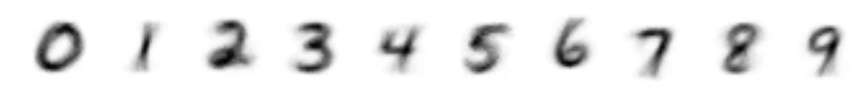

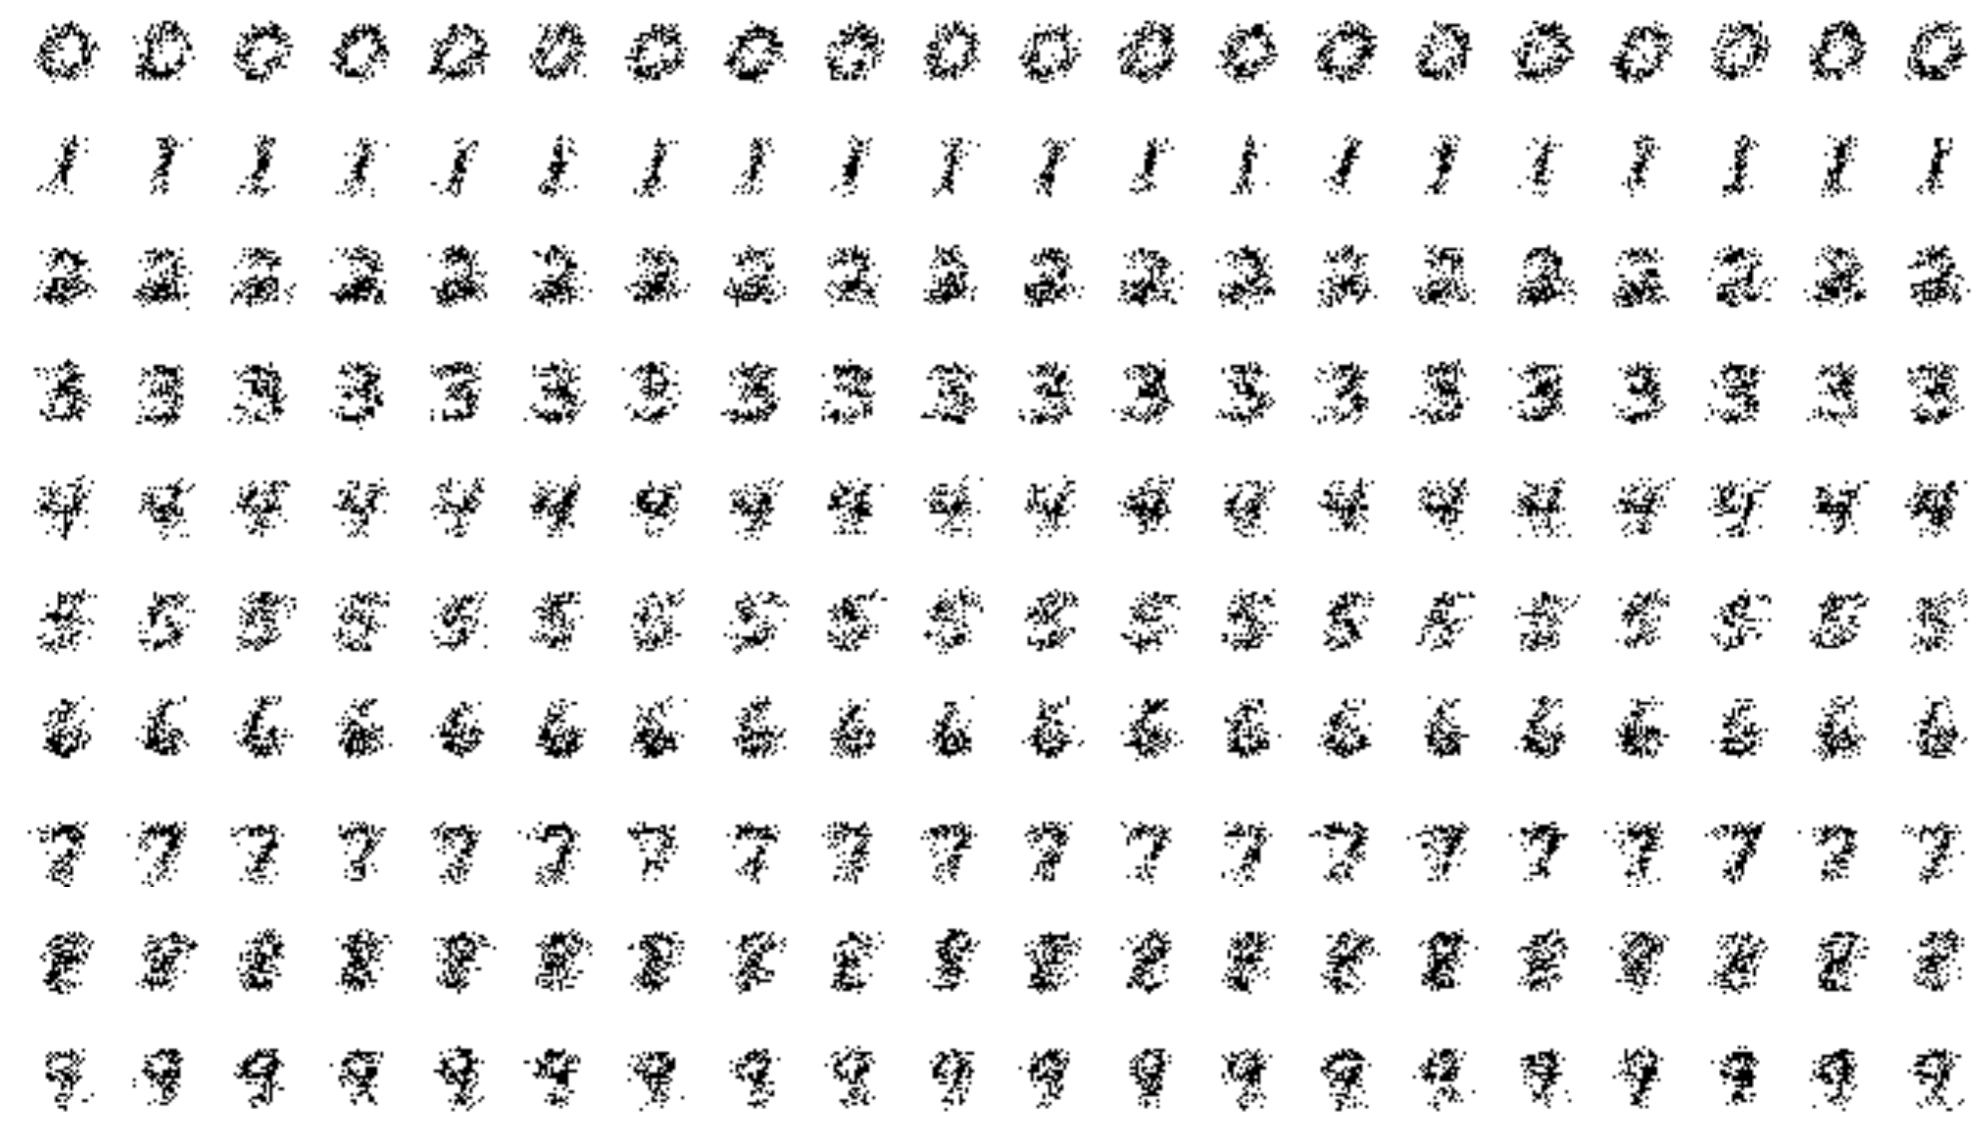

In [33]:
def P10(num_examples):

### STUDENT START ###
    alpha = 0.0001
    threshold = 0.5
    plt.figure(figsize=(15, 5))
    clf = BernoulliNB(alpha=alpha, binarize=threshold)
    clf.fit(mini_train_data, mini_train_labels)
    # Printing digits from the probabilities
    for i in range(clf.feature_log_prob_.shape[0]):
        plt.subplot(1, 10, i+1)
        plt.axis('off')
        plt.imshow(np.exp(clf.feature_log_prob_[i]).reshape(28, 28))

    # Printing grid of 10 X 20 generative digits
    plt.figure(figsize=(35, 20))
    for i in range(clf.feature_log_prob_.shape[0]):
        digit_prob = np.exp(clf.feature_log_prob_[i])
        num_per_digit = num_examples
        for k in range(num_per_digit):
            random_probs = np.random.rand(clf.feature_log_prob_.shape[1])
            image = 1*(digit_prob > random_probs)
            fignum = i*num_per_digit + (k+1)
            plt.subplot(10, num_per_digit, fignum)
            plt.axis('off')
            plt.imshow(image.reshape(28, 28))

### STUDENT END ###

P10(20)

** ANSWER: **  
The first row of digits above are generated directly from the probabilities. This digits a very readable.  
The generated digits on the other hand are very fuzzy and compare poorly with the training data. Many digits are  understandable only because I know what they are.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train BernoulliNB model with a reasonable alpha value. Get the maximum posterior probability for each prediction and fill in the corresponding values for "correct" and "total" so you can display the accuracy for each bucket. Don't make the buckets cumulative -- that is, each maximum posterior should correspond to a single bucket.

How would you characterize the calibration for the Naive Bayes model?

[3 pts]

In [34]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    alpha = 0.0001
    threshold = 0.5
    clf = BernoulliNB(alpha=alpha, binarize=threshold)
    clf.fit(train_data, train_labels)
    preds = clf.predict(dev_data)
    
    prev_bucket = 0
    for b_index, bucket in enumerate(buckets):
        for index, value in enumerate(clf.predict_proba(dev_data)):
            if value.max() <= bucket and value.max() > prev_bucket:
                total[b_index] += 1
                if preds[index] == dev_labels[index]:
                    correct[b_index] += 1
        prev_bucket = bucket
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = 1.0 * correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   3    accuracy = 0.333
p(pred) <= 0.9000000000000    total =  40    accuracy = 0.575
p(pred) <= 0.9990000000000    total =  97    accuracy = 0.495
p(pred) <= 0.9999900000000    total =  75    accuracy = 0.640
p(pred) <= 0.9999999000000    total =  63    accuracy = 0.714
p(pred) <= 0.9999999990000    total =  70    accuracy = 0.871
p(pred) <= 0.9999999999900    total =  75    accuracy = 0.893
p(pred) <= 0.9999999999999    total =  81    accuracy = 0.926
p(pred) <= 1.0000000000000    total = 496    accuracy = 0.972


** ANSWER: **  
The BernoulliNB classifier is a weak classifier because as the posterior probability of the predicted class increases the accuracy also increases. It is not a strong classifier because at 0.9 posterior probability of  predicted class the accuracy is only 0.45. It is not a poorly calibrated classifier as the there is a correlation between accuracy and posterior probability of predicted class

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

For training on the mini training set,
- \> 84% accuracy: 2 pt
- \> 86% accuracy: 4 pts

BernoulliNB accuracy without additional features: 0.85
BernoulliNB accuracy with additional features: 0.861
Two additional features added: Number of enclosed regions = 1 and 2
Digits with 1 enclosed region: 278.0
Digits with 2 enclosed region: 67.0

Demonstration of Enclosed Region image processing


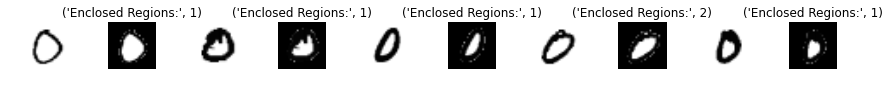

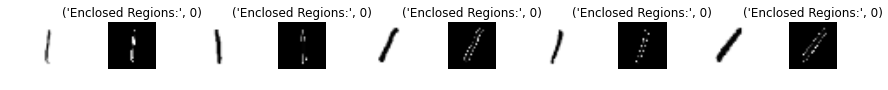

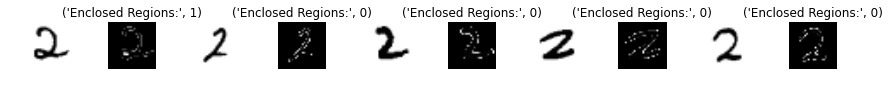

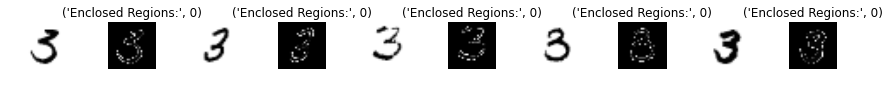

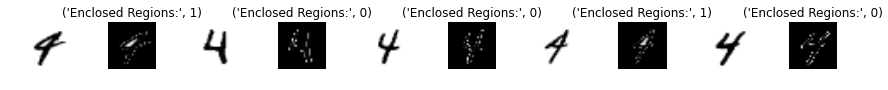

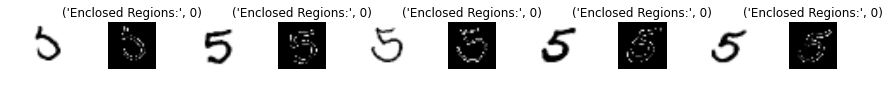

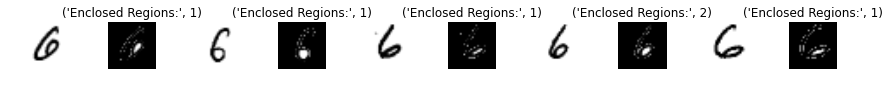

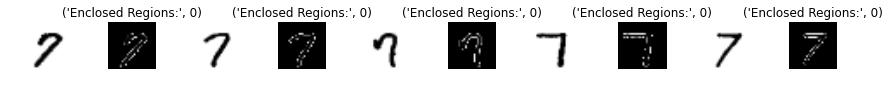

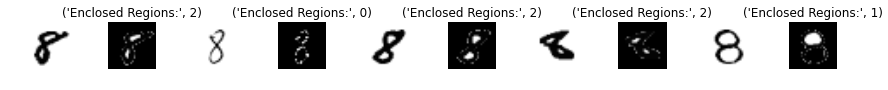

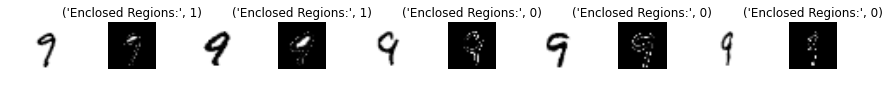

In [133]:
'''
Algorithm for finding number of enclosed regions:
1. Take a binarized digit image
2. Pick the first pixel that is zero (it can be any pixel = 0 rather than the first pixel)
3. Set that pixel to 1
4. Compute its 8 nearest neighbors that are also zero
5. Put them in a bag data structure of pixels
6. Pop one pixel from the bag and repeat from step 3 until bag in empty
7. After bag is empty, if there are no pixels left with value = zero, then enclosed regions = 0
8. If there are pixels that are zero, then enclosed regions can be either 1 ot 2
9. Perform steps 3 to 6 above
10. If all pixels are non-zero then number of enclosed regions = 1
11. If some pixels are zero then number enclosed regions = 2
'''

# This function takes an pixel as an input and returns its immediate neighbors that are zero
def findNeighbors(pixel, flat, edge = 28, threshold = 0.5):
    x = int(pixel/edge); y = pixel - (x * edge)      # Convert index into tuple
    n = [''] * 8
    # Computing the 8 neighbors
    n[0] = (x-1, y-1)
    n[1] = (x-1, y)
    n[2] = (x-1, y+1)
    n[3] = (x, y-1)
    n[4] = (x, y+1)
    n[5] = (x+1, y-1)
    n[6] = (x+1, y)
    n[7] = (x+1, y+1)
    # Removing pixels falling outside the matrix
    nghb = [n[i] for i in range(8) if n[i][0] >= 0 and n[i][1] >= 0 and n[i][0] < edge and n[i][1] < edge]
    pixels = [nghb[i][0]*edge + nghb[i][1] for i in range(len(nghb))]
    # Removing pixels != 0
    pixels = [item for item in pixels if flat[item] <= 0.5]
    return pixels

# This class implments a bag of pixels data structure by using set object. It supports push and pop methods 
class pixelbag():
    def __init__(self):
        self.indices = set()
    
    def push(self, items):
        for item in items:
            self.indices.add(item)    
    
    def pop(self):
        if len(self.indices) == 0:
            return -1
        else:
            return self.indices.pop()
    
    def show(self):
        print "Stack contents:", self.indices

# This function processes image bby converting neighboring zero value pixels into 1
def processImage(flatimage, threshold=0.5):
    flat = np.array(flatimage)
    s = pixelbag()                                         # Instantiate bag of pixels data structure
    firstzeroindex = np.where(flat <= threshold)[0][0]     # First zero index
    flat[firstzeroindex] = 1                               # Picks first pixel with value = 0
    neighbors = findNeighbors(firstzeroindex, flat)        # Find neighboring zero value pixels
    s.push(neighbors)                                      # Push the neighbors to the bag
    while True:                                            # This is the most important loop. 
        nextpixel = s.pop()                                # This loop pops a pixel from the bag 
        if nextpixel == -1:                                # Sets the pixel to 1
            break                                          # Finds its zero value neighbors  
        flat[nextpixel] = 1                                # Pushs the neighbors into the bag  
        neighbors = findNeighbors(nextpixel, flat)
        s.push(neighbors)
    return flat

def numofencloseregions(flatimage, threshold=0.5):         # This function implements algorithm steps 7 to 11
    flat = np.array(flatimage)
    ret = processImage(flat)
    if len(np.where(ret <= threshold)[0]) == 0:            # If no pixels has value = 0 then num of regions = 0
        regions = 0
        return regions
    else:                                                  # If there are zero value pixels then process the processed image again
        ret = processImage(ret)
        if len(np.where(ret <= threshold)[0]) == 0:
            regions = 1
            return regions
        else:
            regions = 2
            return regions
    
def preProcess(input_data):                                # This function utilizes above functions to add additional features
    # Adding 1 to the digit 8 with 2 enclosures
    preprocessed_data = np.array(input_data)
    enc_reg_1 = np.zeros((preprocessed_data.shape[0], 1))  # This variable is 1 if regions = 1 and 0 otherwise
    enc_reg_2 = np.zeros((preprocessed_data.shape[0], 1))  # This variable is 1 if regions = 2 and 0 otherwise 
    for i, val in enumerate(preprocessed_data):
        regions = numofencloseregions(val)
        if regions == 1:
            enc_reg_1[i] = 1
        elif regions == 2:
            enc_reg_2[i] = 1
    preprocessed_data = np.hstack((preprocessed_data, enc_reg_1))
    preprocessed_data = np.hstack((preprocessed_data, enc_reg_2))
    return preprocessed_data


def P12(t_data, t_labels, d_data, d_labels):

### STUDENT START ###
# pre-processing dev_data
    t_t_data = np.array(t_data)
    t_t_data = preProcess(t_t_data)
    t_d_data = np.array(d_data)
    t_d_data = preProcess(t_d_data)
# Classification
    alpha = 0.0001
    threshold = 0.05
    clf = BernoulliNB(alpha=alpha, binarize=threshold)
    clf.fit(t_t_data, t_labels)
    print "BernoulliNB accuracy with additional features:", clf.score(t_d_data, d_labels)
    print "Two additional features added: Number of enclosed regions = 1 and 2"
    print "Digits with 1 enclosed region:", t_t_data[:,784].sum()
    print "Digits with 2 enclosed region:", t_t_data[:,785].sum()
    
### STUDENT END ###

def demonstrateImageProcessing():
    print "\nDemonstration of Enclosed Region image processing"
    for clss in range(10):                        # Show examples for all 10 digits
        numofdigitsperclass = 5                   # Show 5 examples per digit class
        plt.figure(figsize=(15, 10))
        fignum = 1
        indices = np.where(mini_train_labels == clss)[0]   # Select all digits of a digit class
        for i in range(numofdigitsperclass):
            digit = mini_train_data[indices[i]]
            plt.subplot(10, 10, fignum)
            fignum += 1
            plt.imshow(digit.reshape(28, 28))
            plt.axis('off')
            plt.subplot(10, 10, fignum)
            fignum += 1
            plt.imshow(processImage(digit).reshape(28, 28))
            t = 'Enclosed Regions:', numofencloseregions(digit)
            plt.title(t)
            plt.axis('off')

def withoutfeatureaddition(t_data, t_labels, d_data, d_labels):
    alpha = 0.0001
    threshold = 0.05
    clf = BernoulliNB(alpha=alpha, binarize=threshold)
    clf.fit(t_data, t_labels)
    print "BernoulliNB accuracy without additional features:", clf.score(d_data, d_labels)

withoutfeatureaddition(mini_train_data, mini_train_labels, dev_data, dev_labels)
P12(mini_train_data, mini_train_labels, dev_data, dev_labels)
demonstrateImageProcessing()